In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs, make_circles, make_classification, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Generate synthetic dataset
X, y = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM with linear kernel
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# SVM with polynomial kernel
svm_poly = svm.SVC(kernel='poly', degree=3)  # You can experiment with the degree parameter
svm_poly.fit(X_train, y_train)

# SVM with radial basis function (RBF) kernel
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Print accuracy scores
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 1.0
Polynomial Kernel Accuracy: 1.0
RBF Kernel Accuracy: 1.0


In [3]:
def plot_svm_decision_boundary(X, y, svm_model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.figure(figsize=(8, 6))

    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    # Support vectors
    sv = svm_model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k', marker='o')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

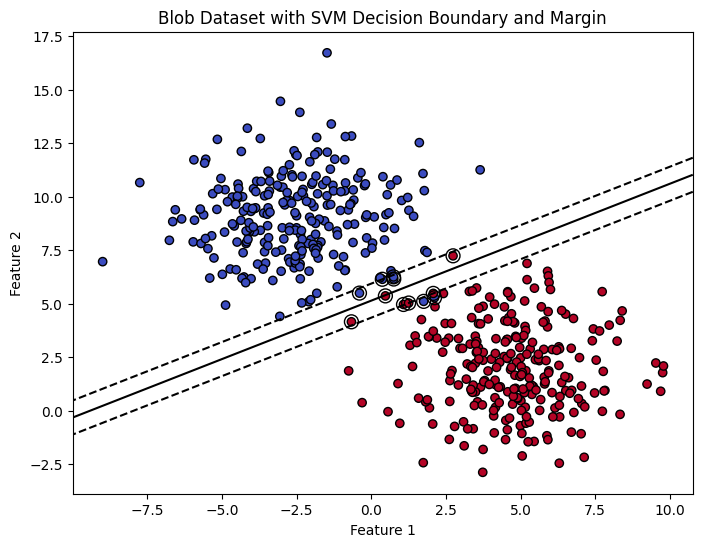

In [4]:
# Generate synthetic dataset with blobs
X, y = make_blobs(n_samples=500, centers=2, cluster_std=2.0, random_state=42)

# Train SVM model with RBF kernel (you can replace this with other kernels if needed)
svm_model = svm.SVC(kernel='linear', C=1.0, gamma='scale')
svm_model.fit(X, y)

# Plot decision boundary and margin
plot_svm_decision_boundary(X, y, svm_model, 'Blob Dataset with SVM Decision Boundary and Margin')

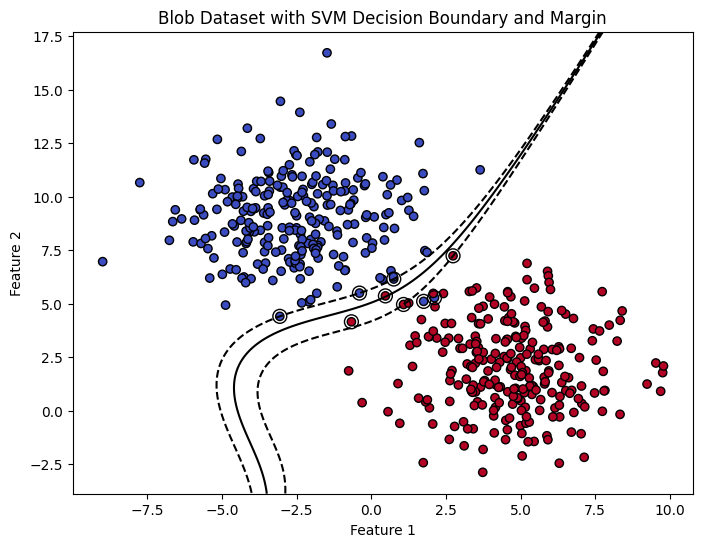

In [5]:
X, y = make_blobs(n_samples=500, centers=2, cluster_std=2.0, random_state=42)

svm_model = svm.SVC(kernel='poly', C=5.0, gamma='auto')
svm_model.fit(X, y)

# Plot decision boundary and margin
plot_svm_decision_boundary(X, y, svm_model, 'Blob Dataset with SVM Decision Boundary and Margin')

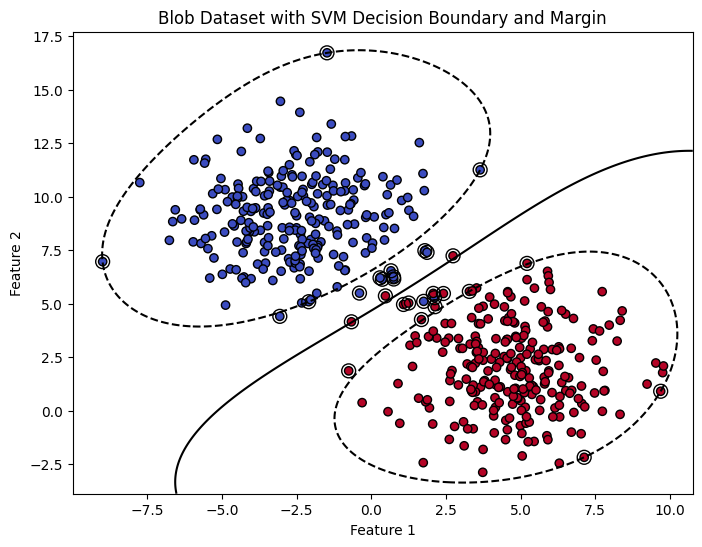

In [28]:
X, y = make_blobs(n_samples=500, centers=2, cluster_std=2.0, random_state=42)

svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X, y)

plot_svm_decision_boundary(X, y, svm_model, 'Blob Dataset with SVM Decision Boundary and Margin')

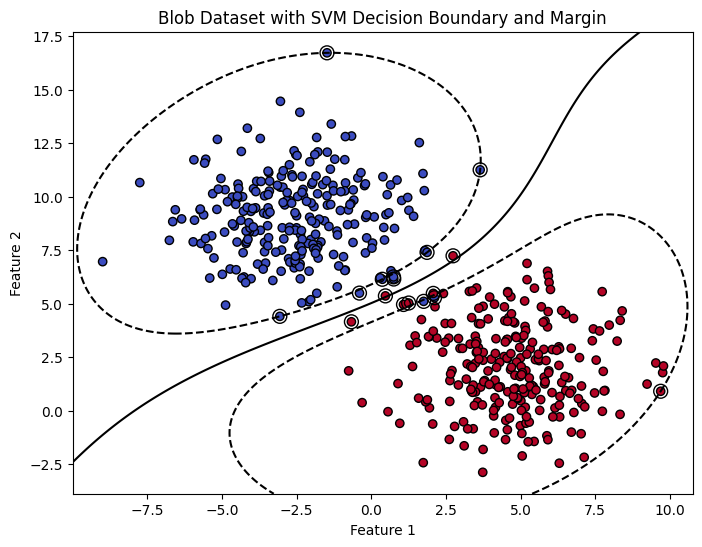

In [27]:
X, y = make_blobs(n_samples=500, centers=2, cluster_std=2.0, random_state=42)

svm_model = svm.SVC(kernel='rbf', C=10.0, gamma='scale')
svm_model.fit(X, y)

plot_svm_decision_boundary(X, y, svm_model, 'Blob Dataset with SVM Decision Boundary and Margin')

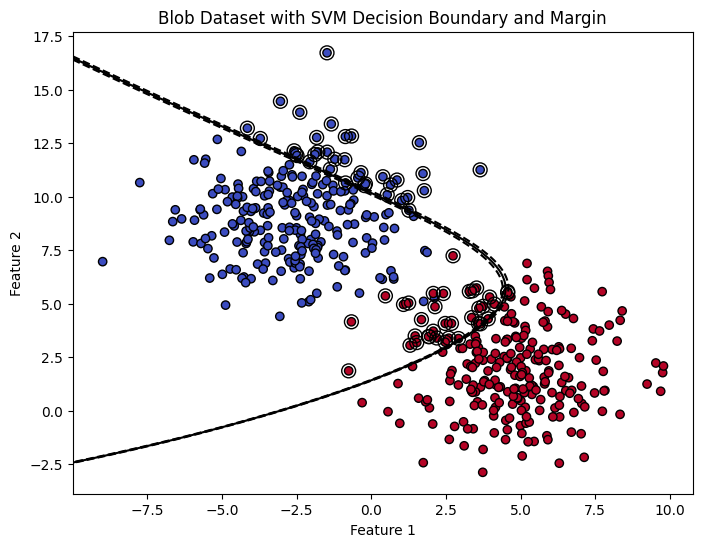

In [26]:
X, y = make_blobs(n_samples=500, centers=2, cluster_std=2.0, random_state=42)

svm_model = svm.SVC(kernel='sigmoid', C=10.0, gamma='scale')
svm_model.fit(X, y)

plot_svm_decision_boundary(X, y, svm_model, 'Blob Dataset with SVM Decision Boundary and Margin')

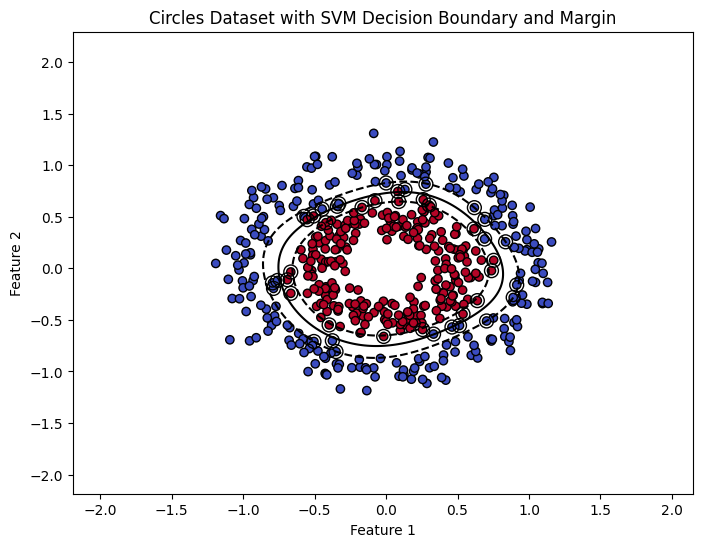

In [25]:
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

svm_model_circles = svm.SVC(kernel='rbf', C=5.0, gamma='scale')
svm_model_circles.fit(X, y)

plot_svm_decision_boundary(X, y, svm_model_circles, 'Circles Dataset with SVM Decision Boundary and Margin')

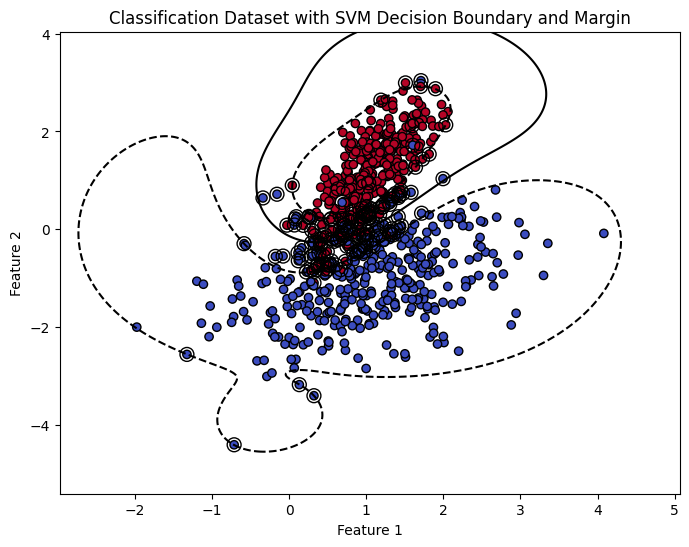

In [24]:
X, y = make_classification(n_samples=750, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

svm_model_classification = svm.SVC(kernel="rbf" ,degree=5, gamma='scale')
svm_model_classification.fit(X, y)

plot_svm_decision_boundary(X, y, svm_model_classification, 'Classification Dataset with SVM Decision Boundary and Margin')

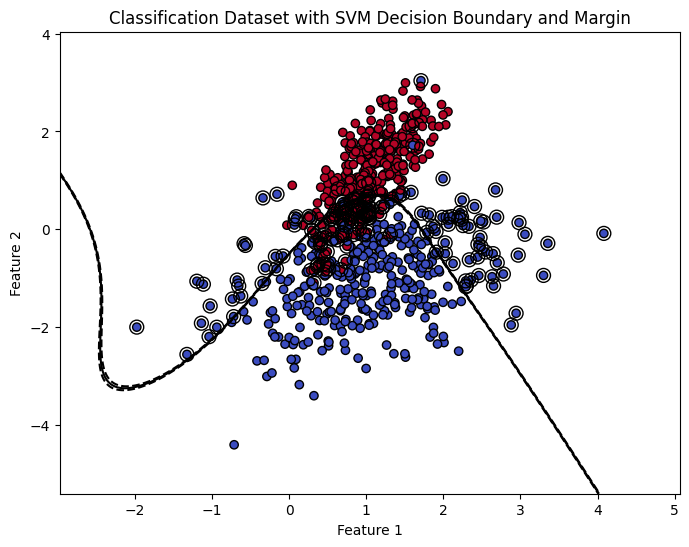

In [23]:
X, y = make_classification(n_samples=750, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

svm_model_classification = svm.SVC(kernel="sigmoid", degree=5, C=10.0, gamma='scale')
svm_model_classification.fit(X, y)

plot_svm_decision_boundary(X, y, svm_model_classification, 'Classification Dataset with SVM Decision Boundary and Margin')

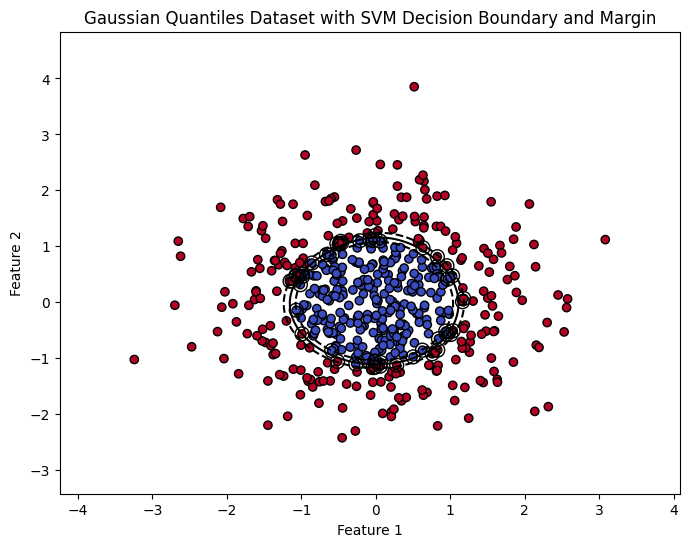

In [22]:
X, y = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2, random_state=42)

svm_model_quantiles = svm.SVC(kernel='rbf', C=15.0, gamma='scale')
svm_model_quantiles.fit(X, y)

plot_svm_decision_boundary(X, y, svm_model_quantiles, 'Gaussian Quantiles Dataset with SVM Decision Boundary and Margin')

# Part 2

In [20]:
import os
import numpy as np
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def load_and_preprocess_data(image_size):
    images_dir = "./images"

    images = []
    labels = []

    for filename in os.listdir(images_dir):
        img_path = os.path.join(images_dir, filename)
        img = io.imread(img_path)
        img = transform.resize(img, (16, 16))  # Resize to 16x16 pixels
        images.append(img.flatten())  # Flatten the image
        labels.append(int(filename[0]))

    return np.array(images), np.array(labels)

image_size = 16
X, y = load_and_preprocess_data(image_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

svm_model = SVC(kernel='linear')  # You can experiment with different kernels and parameters
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9485458612975392
Confusion Matrix:
 [[145   0   1   0   0   0   0   0   0   0]
 [  0 113   0   0   0   0   0   0   0   0]
 [  3   0  94   4   1   0   1   0   0   0]
 [  0   0   0  83   0   2   0   1   0   0]
 [  0   0   2   0  65   0   1   0   0   1]
 [  1   1   3   2   0  60   1   0   1   0]
 [  1   0   0   0   1   1  76   0   0   0]
 [  0   0   1   0   1   0   0  68   0   0]
 [  0   1   1   2   3   0   0   1  63   0]
 [  0   0   0   0   2   1   0   2   2  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       146
           1       0.98      1.00      0.99       113
           2       0.92      0.91      0.92       103
           3       0.91      0.97      0.94        86
           4       0.89      0.94      0.92        69
           5       0.94      0.87      0.90        69
           6       0.96      0.96      0.96        79
           7       0.94      0.97      0.96        70
          

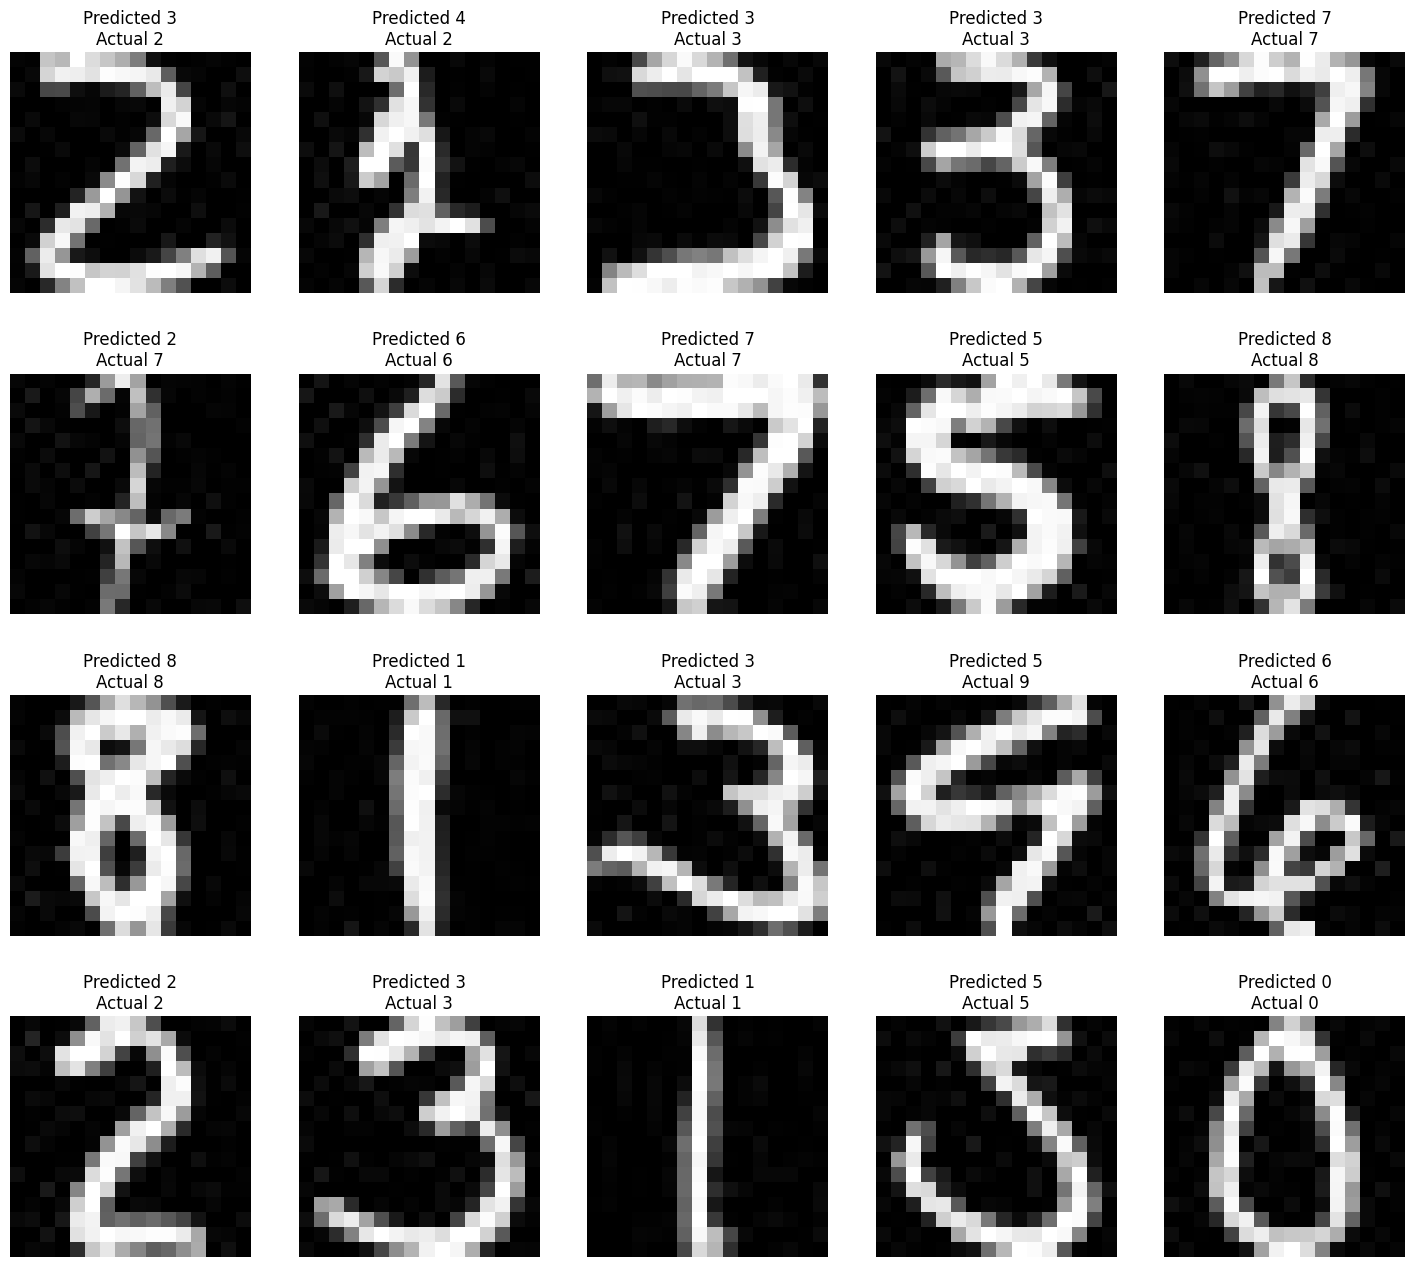

In [21]:
fig, axes = plt.subplots(4, 5, figsize=(18, 16))
axes = axes.ravel()

for i in range(0, 20):
    axes[i].imshow(X_test[i].reshape(16, 16), cmap='gray')
    axes[i].set_title(f"Predicted {y_pred[i]}\nActual {y_test[i]}")
    axes[i].axis('off')

plt.show()